In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#reading the data
loan=pd.read_csv("loan.csv",low_memory=False)

In [17]:
#inspecting tha data
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,...,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,...,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,...,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,...,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,...,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,...,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,...,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,...,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,...,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,...,0.0,NaN,NaN,NaN,NaN


In [18]:
pd.set_option('display.max_columns',10)
pd.set_option('display.width',1000)

In [19]:
loan.shape  #no.of rows and columns of the dataframe

(39717, 111)

In [20]:
#summing up null values column wise
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [21]:
#taking out the percentage of null values
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [22]:
#dropping all the columns with all values null
loan.dropna(axis=1 , how='all' , inplace=True)

In [23]:
#again taking out percentage of null values
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [24]:
#now dropping some other columns with high percentage of null values.
loan=loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [26]:
# analysin unique values in each column 
loan.apply(pd.Series.nunique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [27]:
#deleting columns with only 1 unique value
loan=loan.loc[:,loan.nunique()!=1]

In [28]:
loan.shape

(39717, 44)

In [29]:
loan.apply(pd.Series.nunique)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [30]:
loan.shape

(39717, 44)

In [31]:
#for our analysis we are required to see whether the loan is paid or charged off 
#so removing all the rows with loan status=current
loan=loan.loc[loan['loan_status']!='Current']

In [32]:
loan=loan.drop(['url','id','emp_title','earliest_cr_line'],axis=1)

In [33]:
loan.shape

(38577, 40)

In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
purpose                    38577 non-null object
title                      38566 non-null object
zip_code                   38577 non-null object
addr_stat

In [35]:
loan=loan.drop(['inq_last_6mths','collection_recovery_fee','last_credit_pull_d','last_pymnt_d'],axis=1)

In [36]:
loan.shape

(38577, 36)

In [37]:
loan.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_re

In [38]:
#converting revol_util and int_rate in numeric type
loan['revol_util']=loan['revol_util'].str.rstrip('%').astype('float')
loan['int_rate']=loan['int_rate'].str.rstrip('%').astype('float')

In [39]:
loan.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_re

In [40]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [41]:
#removing special characters from column emp_length
length = loan['emp_length'].str.split('y', expand = True)
loan['emp_length'] = length[0].str.strip()

In [42]:
#extracting month and year from issue_d to help in analysis
issue_date=loan['issue_d'].str.split("-",expand=True)
loan['issue_month']=issue_date[0]
loan['issue_year']=issue_date[1]


In [43]:
term=loan['term'].str.split(" ",expand=True)
loan['term']=term[1]
loan['term']=pd.to_numeric(loan['term'])

In [44]:
#since values of loan_amnt,funded_amnt,funded_amnt_inv have values <=35000
#creating bins 0-10k,10-20k,20-30k,30k+
buckets=[0,10000,20000,30000,35000]
labels=['<10k','10-20k','20-30k','30K+']
loan['loan_amnt_bkt']=pd.cut(loan['loan_amnt'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan['funded_amnt_bkt']=pd.cut(loan['funded_amnt'], bins=buckets, labels=labels, include_lowest=True, right=False)
loan['funded_amnt_inv_bkt']=pd.cut(loan['funded_amnt_inv'], bins=buckets, labels=labels, include_lowest=True, right=False)

In [45]:
#since int_rate has values ranging from 0 to 25
#Creating bins for it
bkts=[0,5,10,15,20,25]
labels=['<5','5-10','10-15','15-20','20+']
loan['int_rate_bkt']=pd.cut(loan['int_rate'], bins=bkts, labels=labels, include_lowest=True, right=False)

In [46]:
loan['annual_inc'].describe(percentiles=[0.1,0.5,0.99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
50%      5.886800e+04
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

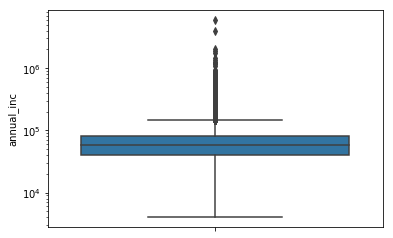

In [47]:
#plotting a boxplot of annual_inc
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')
plt.show()

In [48]:
#we can clearly see the outliers as the max value is 60lakhs and median=58000 

In [49]:
#creating bins for annual inc 
bkts=[0,80000,150000,300000,500000,1000000]
lbls=['very poor','poor','mediocre','high','very high']
loan['annual_inc_bkt']=pd.cut(loan['annual_inc'], bins=bkts, labels=lbls, include_lowest=True, right=False)

In [50]:
# dti is monthly debt payed/total monthly income,so creating bins for it for analysis
bkts=[0,10,18,25,35]
lbls=['0-10','10-18','18-25','25-35']
loan['dti_bkt']=pd.cut(loan['dti'], bins=bkts, labels=lbls, include_lowest=True, right=False)

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


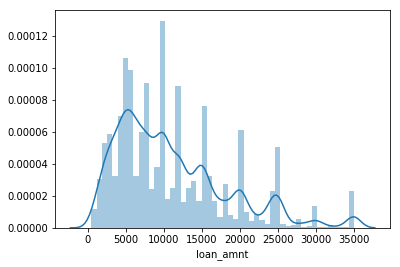

In [51]:
sns.distplot(loan['loan_amnt'])
plt.show()

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


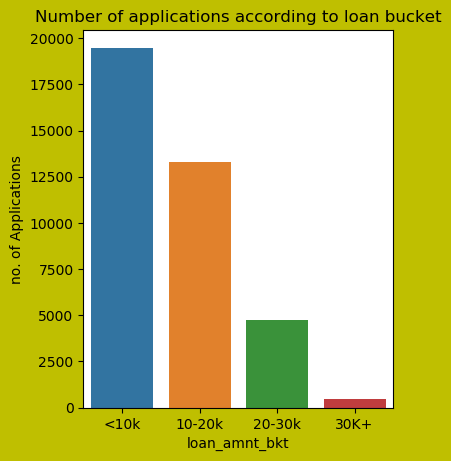

In [52]:
plt.figure(num=None,figsize=(4,5),dpi=100,edgecolor='w',facecolor='y')
sns.barplot(x=('loan_amnt_bkt'),y='member_id', data=loan, estimator=len)
plt.title('Number of applications according to loan bucket')
plt.ylabel("no. of Applications")
plt.show()

In [53]:
loan['loan_amnt_bkt'].value_counts()/len(loan.index)*100

<10k      50.457527
10-20k    34.489463
20-30k    12.274153
30K+       1.220935
Name: loan_amnt_bkt, dtype: float64

In [54]:
#analysing the correlation of loan amount,funded loan amount,funded amount inv
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981790,0.937922
funded_amnt,0.981790,1.000000,0.956172
funded_amnt_inv,0.937922,0.956172,1.000000


# it can be seen that 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', are highly correlated 

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


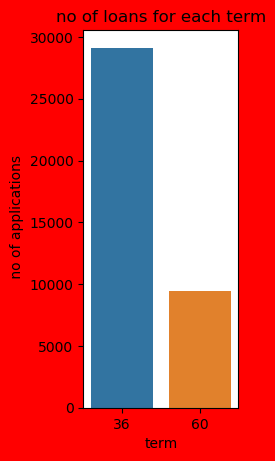

36    75.42318
60    24.57682
Name: term, dtype: float64

In [55]:
plt.figure(figsize=(2,5),dpi=100,edgecolor='w',facecolor='r')
sns.barplot(x='term',y='member_id',data=loan, estimator= len)
plt.title("no of loans for each term")
plt.ylabel(" no of applications")
plt.show()
loan['term'].value_counts()/len(loan.index)*100

### more were given loan with term=36 months, which constitutes around 75% of total loan applications

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


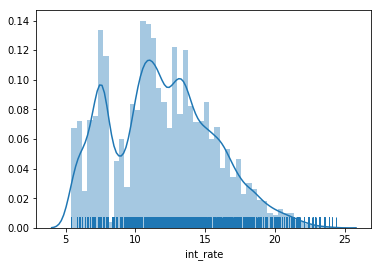

In [56]:
sns.distplot(loan['int_rate'],rug=True)
plt.show()

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


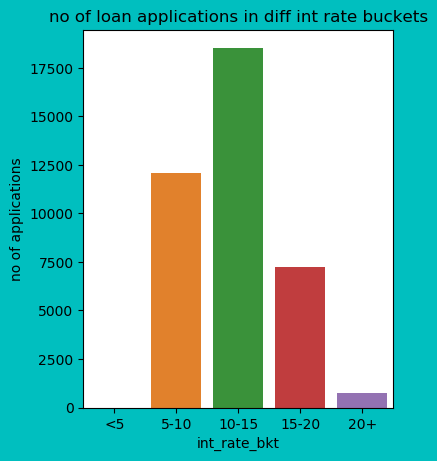

In [57]:
plt.figure(figsize=(4,5),dpi=100,edgecolor='w',facecolor='c')
sns.barplot(x='int_rate_bkt',y='member_id',data=loan, estimator= len)
plt.title("no of loan applications in diff int rate buckets")
plt.ylabel("no of applications")
plt.show()

In [58]:
loan['int_rate_bkt'].value_counts()/len(loan.index)*100

10-15    47.992327
5-10     31.280297
15-20    18.731368
20+       1.996008
<5        0.000000
Name: int_rate_bkt, dtype: float64

### max people  i.e around 48% people were given loan with int rate between 10-15%

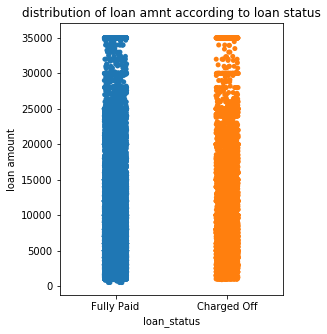

In [59]:
plt.figure(figsize=(4,5))
sns.stripplot(x='loan_status',y='loan_amnt',data=loan, jitter=True)
plt.title("distribution of loan amnt according to loan status")
plt.ylabel("loan amount")
plt.show()

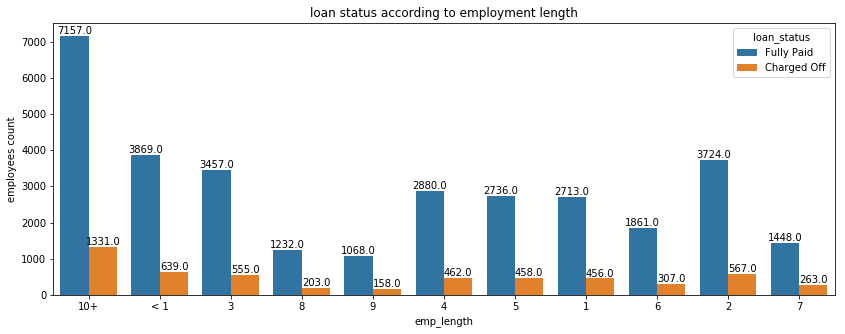

In [60]:
plt.figure(figsize=(14,5))
fig2=sns.countplot(x='emp_length',hue='loan_status',data=loan)
plt.title("loan status according to employment length")
plt.ylabel("employees count")
ncount=len(loan)
for p in fig2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig2.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.show()

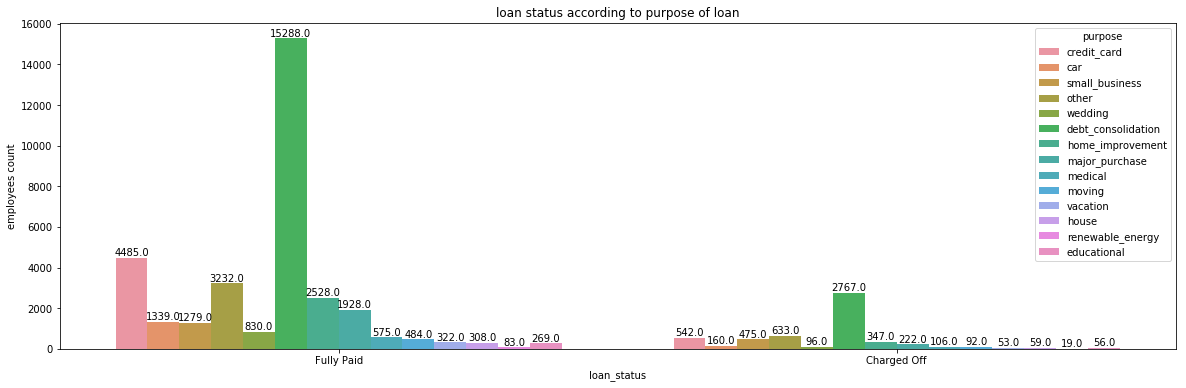

In [61]:
plt.figure(figsize=(20,6))
fig3=sns.countplot(x='loan_status',hue='purpose',data=loan)
plt.title("loan status according to purpose of loan")
plt.ylabel("employees count")
ncount=len(loan)
for p in fig3.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig3.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.rcParams.update({'font.size':10})
plt.show()

## status of loan vs purpose of loan ,we can see that max ppl take loan for debt consolidation 
## almost 47% ppl take loan for it ,approximately 85% of them pay their loan but 15% default 

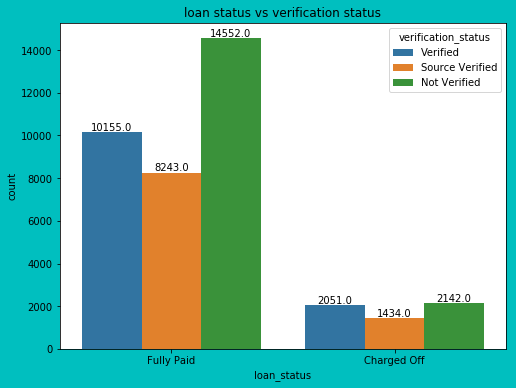

In [63]:
plt.figure(figsize=(8,6),edgecolor='w',facecolor='c')
fig5=sns.countplot(x='loan_status',hue='verification_status',data=loan)
plt.title("loan status vs verification status")
ncount=len(loan)
for p in fig5.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig5.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.rcParams.update({'font.size':10})


plt.show()

## approx 17%  of the people whose income was verified ,defaults. So officials should verify correctly.

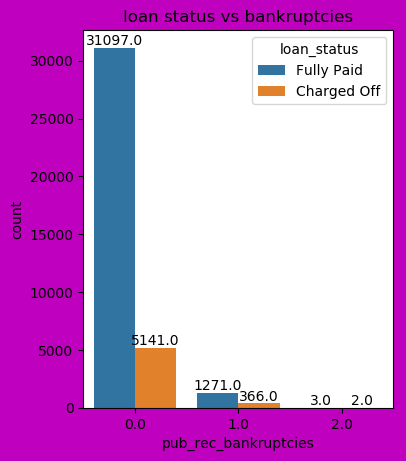

In [64]:
plt.figure(figsize=(4,5),dpi=100,edgecolor='w',facecolor='m')
fig6=sns.countplot(x='pub_rec_bankruptcies',hue='loan_status',data=loan)
ncount=len(loan)
plt.title("loan status vs bankruptcies")
for p in fig6.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig6.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.rcParams.update({'font.size':10})
plt.show()

F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


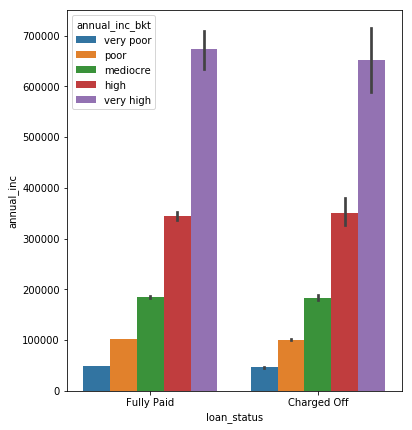

In [65]:
plt.figure(figsize=(6,7))
sns.barplot(x='loan_status',y='annual_inc',hue='annual_inc_bkt',data=loan)
plt.show()

In [66]:
df1=pd.crosstab(loan.annual_inc_bkt,loan.loan_status)
df1

loan_status,Charged Off,Fully Paid
annual_inc_bkt,,
very poor,4415,23531
poor,1023,7899
mediocre,165,1326
high,13,134
very high,10,47


F:\UpGrad\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


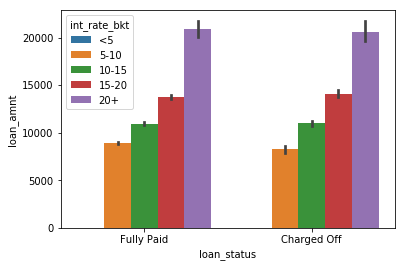

In [67]:
sns.barplot(x='loan_status',y='loan_amnt',hue='int_rate_bkt',data=loan)
plt.show()

In [68]:
df2=pd.crosstab([loan.loan_amnt_bkt,loan.int_rate_bkt],loan.loan_status,normalize='index')
df2

loan_status                 Charged Off  Fully Paid
loan_amnt_bkt int_rate_bkt                         
<10k          5-10             0.070596    0.929404
              10-15            0.149510    0.850490
              15-20            0.245326    0.754674
              20+              0.362745    0.637255
10-20k        5-10             0.060459    0.939541
              10-15            0.145843    0.854157
              15-20            0.245009    0.754991
              20+              0.438356    0.561644
20-30k        5-10             0.053265    0.946735
              10-15            0.142339    0.857661
              15-20            0.257532    0.742468
              20+              0.351254    0.648746
30K+          5-10             0.061224    0.938776
              10-15            0.171053    0.828947
              15-20            0.255000    0.745000
              20+              0.271429    0.728571

### here we can see that as the int rate increases in the respective loan amount bucket,the no . of ldefaulters increases. 

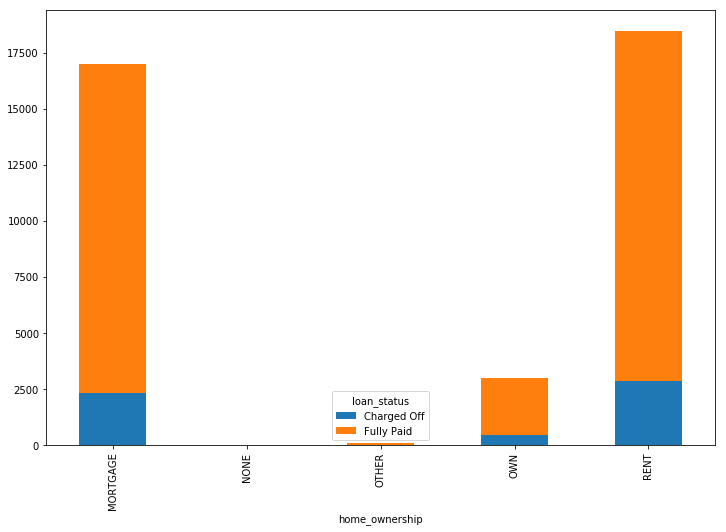

In [69]:

fig, ax=plt.subplots(figsize=(12,8))
loan.groupby(['home_ownership','loan_status'])['member_id'].count().unstack().plot(kind='bar', stacked=True,ax=ax)
plt.show()

## it can be seen from here that customers living in rented or mortgaged homes default by  a larger percentage,as compared to customers living in owned homes.

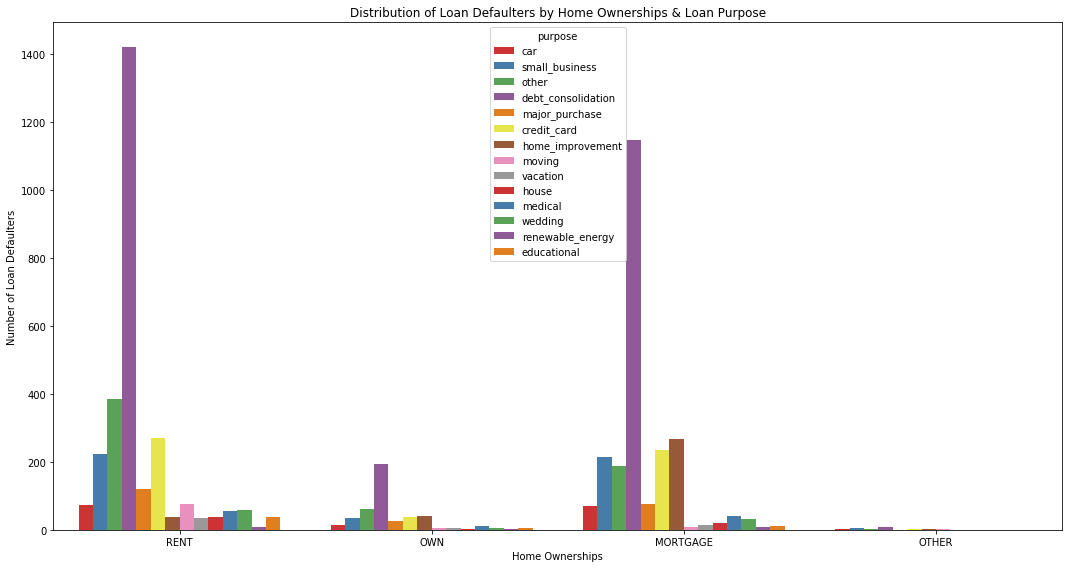

In [72]:
plt.figure(figsize=(15,8))
fig9=sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set1")
plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

## for Rented home customers --> highest defaulters are in debt consolidation ,credit card,small bussiness  and others
## for customers living in their own home--> debt consolidation appears to be highest default group.
## for customers in mortgaged homes--> ,highest defaulters lie in debt consolidation ,home improvement, credit card  group


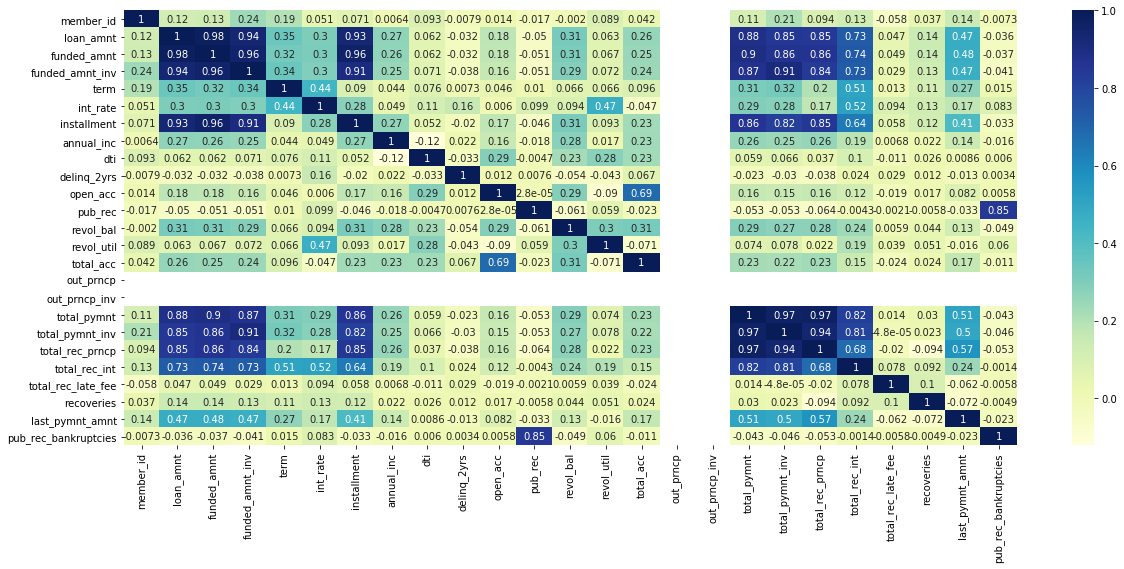

In [71]:
cor=loan.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor,cmap='YlGnBu', annot=True)
plt.show()
